<a href="https://colab.research.google.com/github/Manivannan-maker/TinyML/blob/main/BatteryvoltageEstimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Battery Voltage estimator
When a fully charged  Li ion battery ( 4.2 V)  discharge at 1 A current , it will be get drianed at 2 hours 30 mins ( 150mins) with the voltage as 3.3 V.

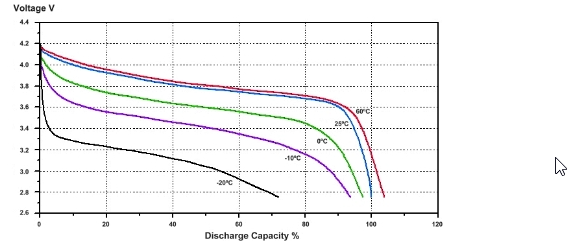

In This project , The ML model will predict the battery voltage based on input ( minutes).



# Steps to be followed


Steps to be followed in Creating a Machine Learning from scratch

1.   **Import dependencies**
2.   **Training Data Generation**
3.   **Noise generation**
4.   **Data Splitting**
5.   **Model Designing- Neural Network**
6.   **Model training**
7.   **Compare the loss**
8.   **Test with New data**










# Import dependencies

In [1]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

## Data generation

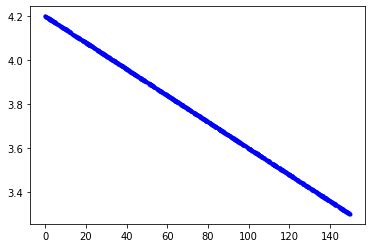

In [2]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 150 mins , which covers a complete battery discharge range time
time = np.random.uniform(
    low=0, high=150, size=SAMPLES).astype(np.float32)


# Shuffle the values to guarantee they're not in order
np.random.shuffle(time)

#The data generation will be similar to the above graph 

# Calculate the corresponding voltage value using linear interpolation formula 
Batteryvoltage = 4.2 + ((((time-0)*(3.3-4.2))/(150-0)))

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(time, Batteryvoltage, 'b.')


plt.show()

### 2. Add Noise
Since it was generated directly by the  function, our data fits a nice, smooth curve.

However, machine learning models are good at extracting underlying meaning from messy, real world data. To demonstrate this, we can add some noise to our data to approximate something more life-like.

In the following cell, we'll add some random noise to each value, then draw a new graph:

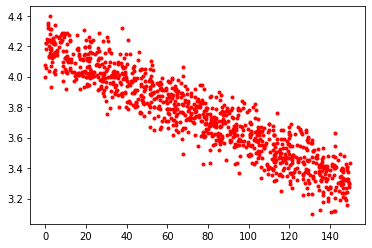

In [3]:
# Add a small random number to each y value
Batteryvoltage += 0.1 * np.random.randn(*Batteryvoltage.shape)

# Plot our data
plt.plot(time, Batteryvoltage, 'r.')
plt.show()

### 3. Split the Data
We now have a noisy dataset that approximates real world data. We'll be using this to train our model.

To evaluate the accuracy of the model we train, we'll need to compare its predictions to real data and check how well they match up. This evaluation happens during training (where it is referred to as validation) and after training (referred to as testing) It's important in both cases that we use fresh data that was not already used to train the model.

The data is split as follows:
  1. Training: 60%
  2. Validation: 20%
  3. Testing: 20% 

The following code will split our data and then plots each set as a different color:

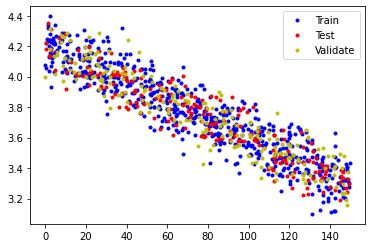

In [4]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. 

#Calculate the indices of each section.
# Training = 600 , Testing 800
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(time, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(Batteryvoltage, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")


plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()


# Model Designing - Neural network
We're going to build a simple neural network model that will take an input value (in this case, `x`) and use it to predict a numeric output value . This type of problem is called a _regression_. It will use _layers_ of _neurons_ to attempt to learn any patterns underlying the training data, so it can make predictions.

To begin with, we'll define two layers. The first layer takes a single input (our `x` value) and runs it through **8** neurons. Based on this input, each neuron will become _activated_ to a certain degree based on its internal state (its _weight_ and _bias_ values). A neuron's degree of activation is expressed as a number.

The activation numbers from our first layer will be fed as inputs to our second layer, which is a single neuron. It will apply its own weights and bias to these inputs and calculate its own activation, which will be output as our `y` value.

In [5]:
# We'll use Keras to create a simple model architecture

model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 8 "neurons". The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(keras.layers.Dense(8, input_shape=(1,)))

# The new second and third layer will help the network learn more complex representations
#model_1.add(keras.layers.Dense(8))

# Final layer is a single neuron, since we want to output a single value
model_1.add(keras.layers.Dense(1))

#model_1 = tf.keras.Sequential([keras.layers.Dense(units=1,input_shape=[1])])


# Compile the model using the standard 'adam' optimizer and the mean squared error or 'mse' loss function for regression.
model_1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

# Model Training
Once we've defined the model, we can use our data to _train_ it. Training involves passing an `x` value into the neural network, checking how far the network's output deviates from the expected `y` value, and adjusting the neurons' weights and biases so that the output is more likely to be correct the next time.

Training runs this process on the full dataset multiple times, and each full run-through is known as an _epoch_. The number of epochs to run during training is a parameter we can set.

During each epoch, data is run through the network in multiple _batches_. Each batch, several pieces of data are passed into the network, producing output values. These outputs' correctness is measured in aggregate and the network's weights and biases are adjusted accordingly, once per batch. The _batch size_ is also a parameter we can set.

The code in the following cell uses the `x` and `y` values from our training data to train the model. It runs for 500 _epochs_, with 32 pieces of data in each _batch_. We also pass in some data for _validation_. As you will see when you run the cell, training can take a while to complete:



In [9]:
# Train the model on our training data while validating on our validation set
history_1=model_1.fit(x_train,y_train,epochs=500,batch_size=32,validation_data=(x_validate,y_validate) )

Epoch 1/500
19/19 [==============================] - 0s 4ms/step - loss: 0.0128 - mae: 0.0905 - val_loss: 0.0191 - val_mae: 0.1106
Epoch 2/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0135 - mae: 0.0921 - val_loss: 0.0135 - val_mae: 0.0933
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0123 - mae: 0.0886 - val_loss: 0.0109 - val_mae: 0.0847
Epoch 4/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0884 - val_loss: 0.0108 - val_mae: 0.0841
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0126 - mae: 0.0892 - val_loss: 0.0109 - val_mae: 0.0845
Epoch 6/500
19/19 [==============================] - 0s 2ms/step - loss: 0.0143 - mae: 0.0958 - val_loss: 0.0167 - val_mae: 0.1032
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0130 - mae: 0.0906 - val_loss: 0.0106 - val_mae: 0.0834
Epoch 8/500
19/19 [==============================] - 0s 3ms/step - loss: 0.0137 - m

In [ ]:
print(model_1.predict([1]))

**Important Note **
Make sure the val_loss is lesser than loss . 
Or else the Model is** over fitting**

# Compare the loss

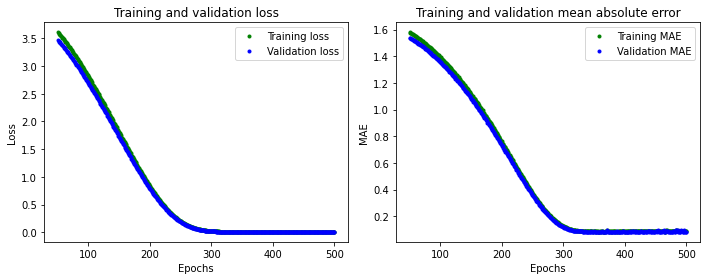

In [7]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Exclude the first few epochs so the graph is easier to read
SKIP = 50

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs[SKIP:], train_loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
train_mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], train_mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()

# Testing with new data
** Generate new test data for testing the model**



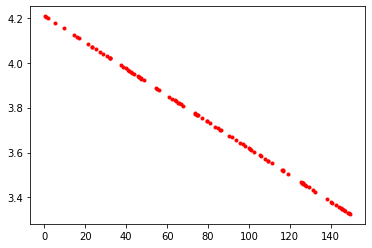

In [8]:


testing = np.random.uniform(
    low=0, high=150, size=100).astype(np.float32)

#print(model_1.predict([testing]))

# Plot our data
plt.plot(testing, model_1.predict([testing]), 'r.')
#plt.plot(time, Batteryvoltage, 'y.')
plt.show()


